In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [2]:
train_dir = 'Training'
test_dir = 'Testing'

In [3]:
# Image dimensions
img_width, img_height = 150, 150
batch_size = 32
num_classes = 4

In [4]:
# Enhanced Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 394 images belonging to 4 classes.


In [8]:
# Improved CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

C:\Users\Shravani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Train the model
epochs = 60
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
)

Epoch 1/60


C:\Users\Shravani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 60s 600ms/step - accuracy: 0.3184 - loss: 2.8143 - val_accuracy: 0.1878 - val_loss: 1.9993
Epoch 2/60
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 598ms/step - accuracy: 0.3708 - loss: 1.4690 - val_accuracy: 0.1878 - val_loss: 2.7180
Epoch 3/60
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 604ms/step - accuracy: 0.3875 - loss: 1.3892 - val_accuracy: 0.1853 - val_loss: 1.6857
Epoch 4/60
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 593ms/step - accuracy: 0.4454 - loss: 1.2912 - val_accuracy: 0.2995 - val_loss: 1.3744
Epoch 5/60
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 578ms/step - accuracy: 0.4560 - loss: 1.2163 - val_accuracy: 0.3426 - val_loss: 1.4772
Epoch 6/60
90/90 ━━━━━━━━━━━━━━━━━━━━ 53s 578ms/step - accuracy: 0.4854 - loss: 1.1580 - val_accuracy: 0.2919 - val_loss: 1.5715
Epoch 7/60
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 582ms/step - accuracy: 0.5209 - loss: 1.1229 - val_accuracy: 0.3909 - val_loss: 1.6274
Epoch 8/60
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 592ms/step - accuracy: 0.5552 - loss: 1.0659 - val_accuracy: 0.258

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.3257 - loss: 6.9322
Test Accuracy: 53.81%


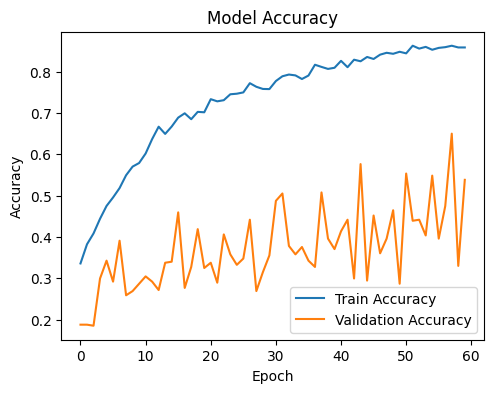

In [15]:
# Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

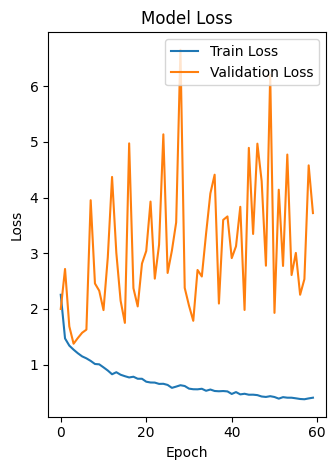

In [16]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


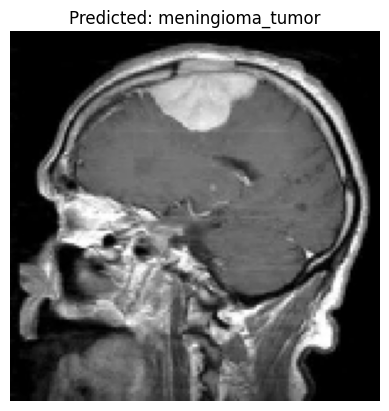

In [17]:
# Prediction on a single image from the test set
class_labels = list(train_generator.class_indices.keys())
test_image_path = 'Testing/meningioma_tumor/image(46).jpg'  # Replace with the path to your test image
img = image.load_img(test_image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]

# Display the image with its predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()